In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Getting data

In [2]:
con = "postgresql://robot-startml-ro:password@""postgres.lab.karpov.courses:6432/startml"

In [4]:
#POST_TEXT_DF

post_text_df = pd.read_sql(
    """SELECT * FROM "post_text_df" """,
    con=con
)

post_text_df

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business
...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie
7019,7316,I give this movie 2 stars purely because of it...,movie
7020,7317,I cant believe this film was allowed to be mad...,movie
7021,7318,The version I saw of this film was the Blockbu...,movie


In [5]:
#USER_DATA
user_data = pd.read_sql(
    """SELECT * FROM "user_data" """,
    con=con
)

user_data

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [6]:
#FEED_DATA

feed_data = pd.read_sql(
    """SELECT * FROM "feed_data" LIMIT 5000""",
    con=con
)

feed_data

,timestamp,user_id,post_id,action,target
0,2021-11-28 20:22:10,79405,4671,view,0
1,2021-11-28 20:22:49,79405,3722,view,0
2,2021-11-28 20:23:30,79405,3275,view,0
3,2021-11-28 20:25:00,79405,1009,view,0
4,2021-11-28 20:27:37,79405,2781,view,1
...,...,...,...,...,...
4995,2021-11-03 22:21:25,43182,4062,view,0
4996,2021-11-03 22:23:02,43182,6796,view,1
4997,2021-11-03 22:24:41,43182,6796,like,0
4998,2021-11-03 22:24:43,43182,5719,view,0


table1 = pd.read_sql(
    """SELECT *
    FROM "feed_data" fd
    INNER JOIN "user_data" ud on fd.user_id = ud.user_id
    INNER JOIN "post_text_df" pt on fd.post_id = pt.post_id
    LIMIT 100000""",
    con=con
)
table1

In [7]:
df = pd.merge(feed_data, user_data, on='user_id', how='left')
df = pd.merge(df, post_text_df, on='post_id', how='left')

In [8]:
df

,timestamp,user_id,post_id,action,target,gender,age,country,city,exp_group,os,source,text,topic
0,2021-11-28 20:22:10,79405,4671,view,0,0,15,Russia,Noginsk,3,iOS,ads,"Like the first film in this series (SLAUGHTER,...",movie
1,2021-11-28 20:22:49,79405,3722,view,0,0,15,Russia,Noginsk,3,iOS,ads,Vlog is ready. Im trying a few new things this...,covid
2,2021-11-28 20:23:30,79405,3275,view,0,0,15,Russia,Noginsk,3,iOS,ads,Sometimes doing something nice for somebody el...,covid
3,2021-11-28 20:25:00,79405,1009,view,0,0,15,Russia,Noginsk,3,iOS,ads,Debate needed on donations cap\n\nA cap on don...,politics
4,2021-11-28 20:27:37,79405,2781,view,1,0,15,Russia,Noginsk,3,iOS,ads,So how is #COVID19 going to affect us in the w...,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2021-11-03 22:21:25,43182,4062,view,0,1,41,Russia,Biysk,2,Android,ads,"Spike of 63,489 cases and 944 deaths reported ...",covid
4996,2021-11-03 22:23:02,43182,6796,view,1,1,41,Russia,Biysk,2,Android,ads,"1) I am not weapon expert, but even i can see ...",movie
4997,2021-11-03 22:24:41,43182,6796,like,0,1,41,Russia,Biysk,2,Android,ads,"1) I am not weapon expert, but even i can see ...",movie
4998,2021-11-03 22:24:43,43182,5719,view,0,1,41,Russia,Biysk,2,Android,ads,"When we started watching this series on cable,...",movie


## Проверка на пустые значения

In [9]:
df.isna().sum()

timestamp    0
user_id      0
post_id      0
action       0
target       0
gender       0
age          0
country      0
city         0
exp_group    0
os           0
source       0
text         0
topic        0
dtype: int64

In [10]:
unq_users = df.user_id.nunique()
print(f'Кол-во уникальных пользователей = {unq_users}')
unq_posts = df.post_id.nunique()
print(f'Кол-во уникальных постов = {unq_posts}')

Кол-во уникальных пользователей = 22
Кол-во уникальных постов = 3169


In [11]:
df = df.set_index(['user_id', 'post_id'])

In [12]:
df

timestamp action  target  gender  age country  \
user_id post_id                                                           
79405   4671    2021-11-28 20:22:10   view       0       0   15  Russia   
        3722    2021-11-28 20:22:49   view       0       0   15  Russia   
        3275    2021-11-28 20:23:30   view       0       0   15  Russia   
        1009    2021-11-28 20:25:00   view       0       0   15  Russia   
        2781    2021-11-28 20:27:37   view       1       0   15  Russia   
...                             ...    ...     ...     ...  ...     ...   
43182   4062    2021-11-03 22:21:25   view       0       1   41  Russia   
        6796    2021-11-03 22:23:02   view       1       1   41  Russia   
        6796    2021-11-03 22:24:41   like       0       1   41  Russia   
        5719    2021-11-03 22:24:43   view       0       1   41  Russia   
        6248    2021-11-03 22:27:41   view       1       1   41  Russia   

                    city  exp_group       os source  \
user_id post_id                                       
79405   4671     Noginsk          3      iOS    ads   
        3722     Noginsk          3      iOS    ads   
        3275     Noginsk          3      iOS    ads   
        1009     Noginsk          3      iOS    ads   
        2781     Noginsk          3      iOS    ads   
...                  ...        ...      ...    ...   
43182   4062       Biysk          2  Android    ads   
        6796       Biysk          2  Android    ads   
        6796       Biysk          2  Android    ads   
        5719       Biysk          2  Android    ads   
        6248       Biysk          2  Android    ads   

                                                              text     topic  
user_id post_id                                                               
79405   4671     Like the first film in this series (SLAUGHTER,...     movie  
        3722     Vlog is ready. Im trying a few new things this...     covid  
        3275     Sometimes doing something nice for somebody el...     covid  
        1009     Debate needed on donations cap\n\nA cap on don...  politics  
        2781     So how is #COVID19 going to affect us in the w...     covid  
...                                                            ...       ...  
43182   4062     Spike of 63,489 cases and 944 deaths reported ...     covid  
        6796     1) I am not weapon expert, but even i can see ...     movie  
        6796     1) I am not weapon expert, but even i can see ...     movie  
        5719     When we started watching this series on cable,...     movie  
        6248     then you will be a big fan of this movie. Its ...     movie  

[5000 rows x 12 columns]

# EDA

In [13]:
topic_dict = {}
for topic in df.topic.unique():
    topic_dict[topic] = sum(df.topic == topic)

topic_dict = {k: v for k, v in sorted(topic_dict.items(), key=lambda item: item[1])}
for key, value in topic_dict.items():
    print(f'{key} = {value}')

tech = 194
entertainment = 243
business = 312
politics = 471
sport = 637
covid = 1244
movie = 1899


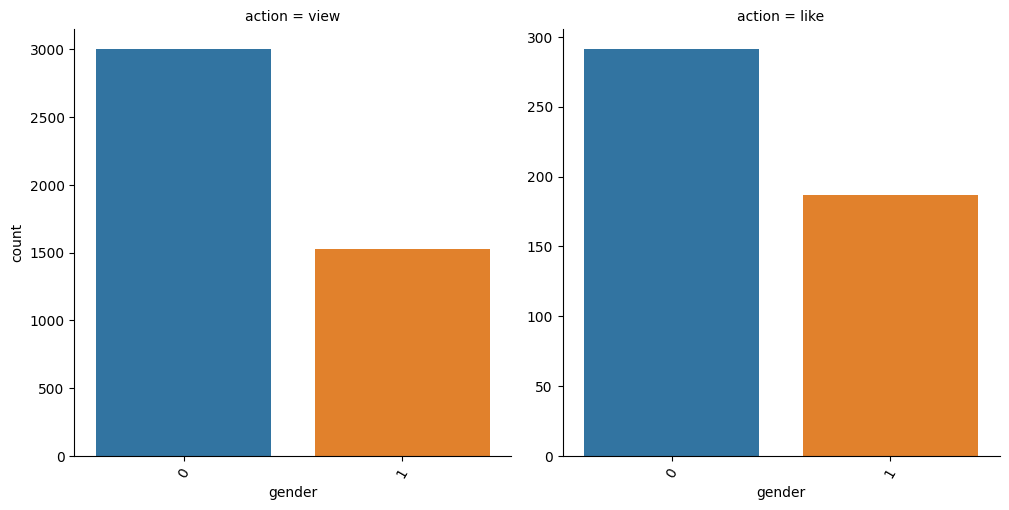

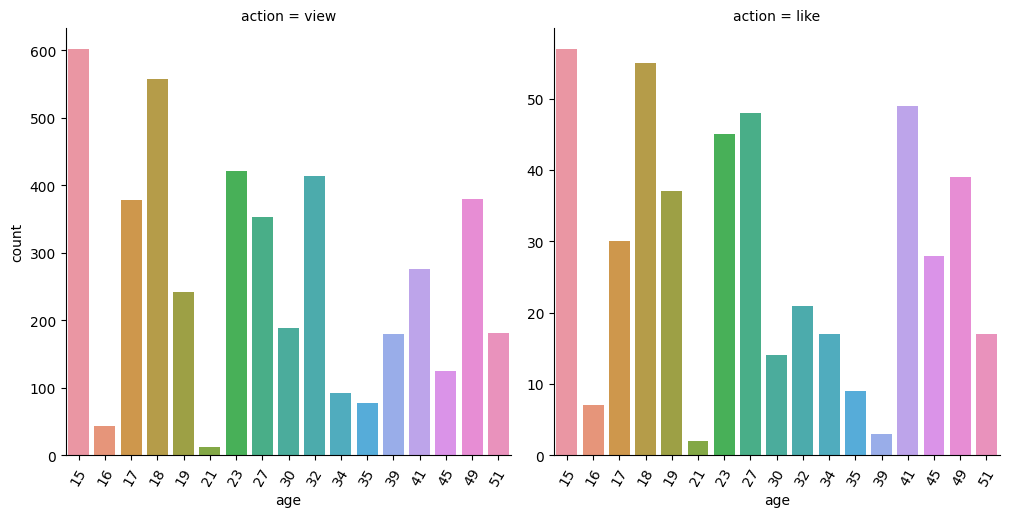

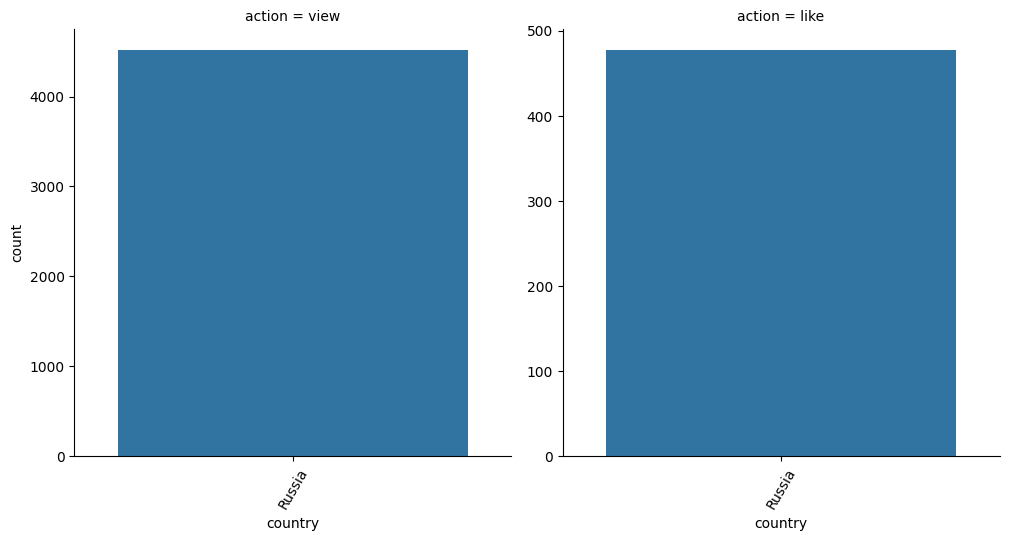

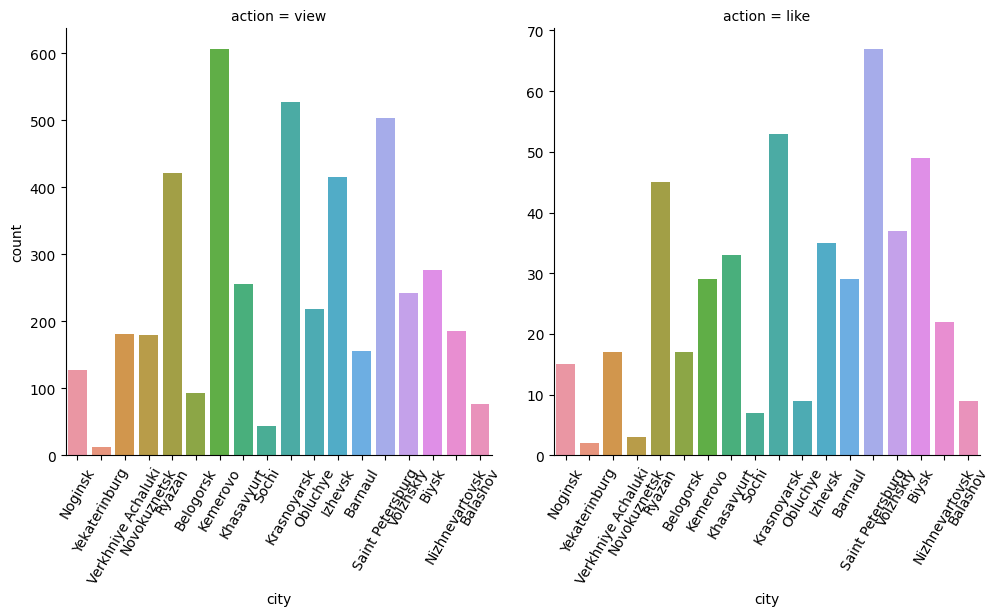

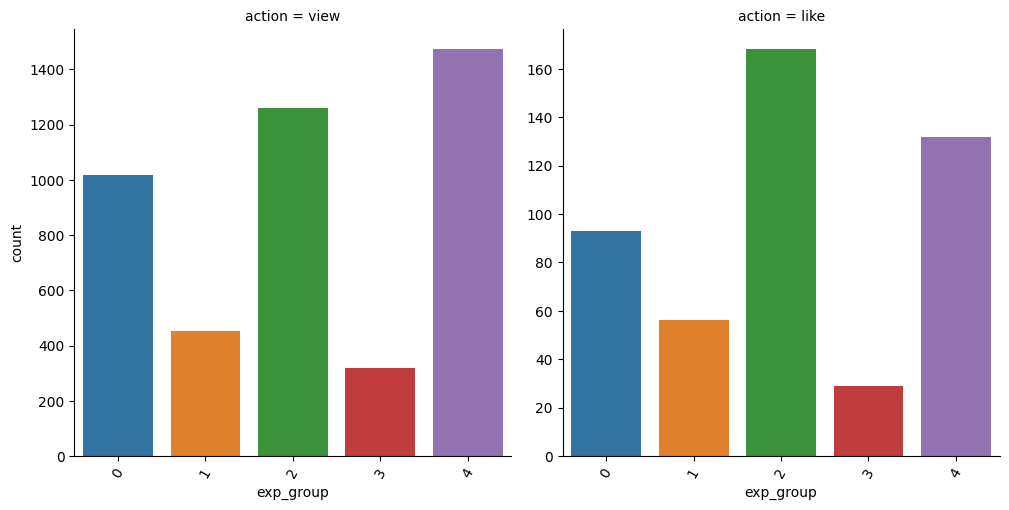

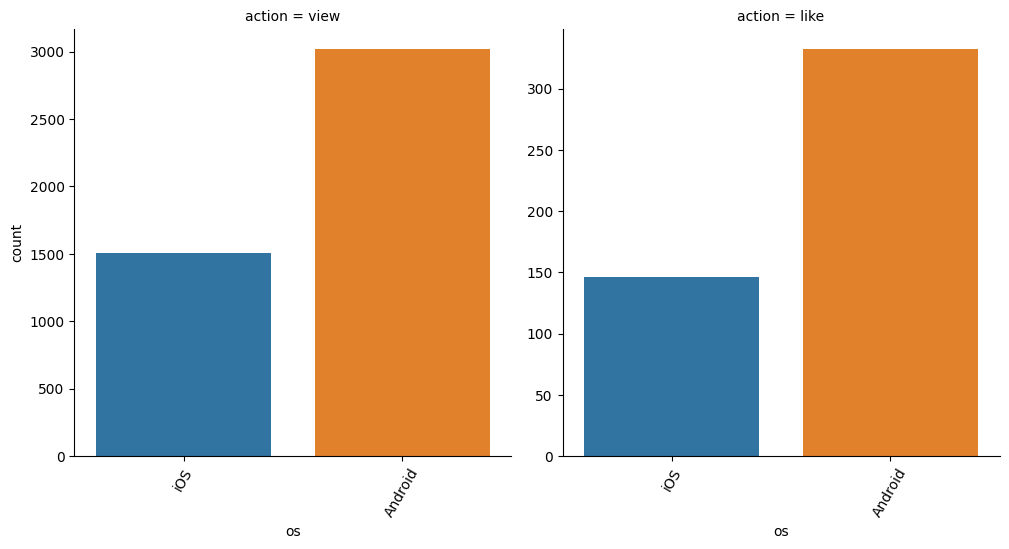

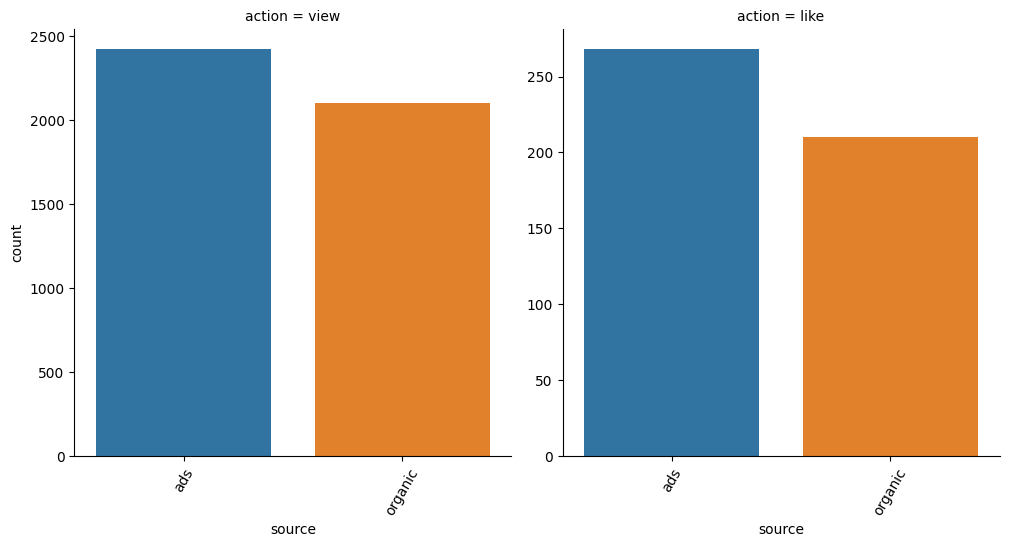

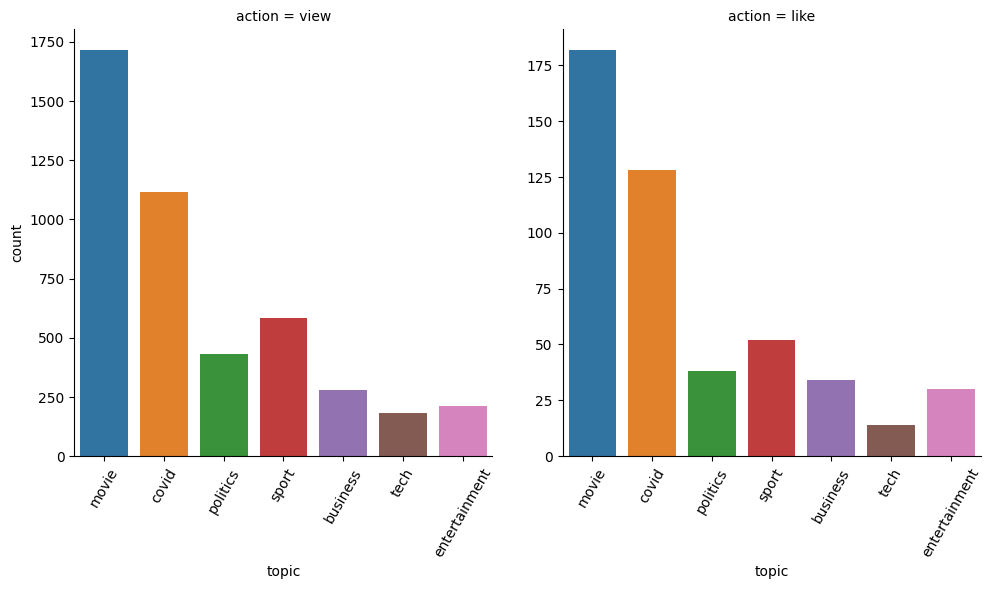

In [14]:
check_cols = ['gender', 'age', 'country', 'city', 'exp_group', 'os', 'source', 'topic']
for col in check_cols:
    g = sns.catplot(x=col, kind='count', col='action', data=df, sharey=False)
    g.set_xticklabels(rotation=60)
plt.show()

In [15]:
feed_data.shape

(5000, 5)

In [18]:
df

timestamp action  target  gender  age country  \
user_id post_id                                                           
79405   4671    2021-11-28 20:22:10   view       0       0   15  Russia   
        3722    2021-11-28 20:22:49   view       0       0   15  Russia   
        3275    2021-11-28 20:23:30   view       0       0   15  Russia   
        1009    2021-11-28 20:25:00   view       0       0   15  Russia   
        2781    2021-11-28 20:27:37   view       1       0   15  Russia   
...                             ...    ...     ...     ...  ...     ...   
43182   4062    2021-11-03 22:21:25   view       0       1   41  Russia   
        6796    2021-11-03 22:23:02   view       1       1   41  Russia   
        6796    2021-11-03 22:24:41   like       0       1   41  Russia   
        5719    2021-11-03 22:24:43   view       0       1   41  Russia   
        6248    2021-11-03 22:27:41   view       1       1   41  Russia   

                    city  exp_group       os source  \
user_id post_id                                       
79405   4671     Noginsk          3      iOS    ads   
        3722     Noginsk          3      iOS    ads   
        3275     Noginsk          3      iOS    ads   
        1009     Noginsk          3      iOS    ads   
        2781     Noginsk          3      iOS    ads   
...                  ...        ...      ...    ...   
43182   4062       Biysk          2  Android    ads   
        6796       Biysk          2  Android    ads   
        6796       Biysk          2  Android    ads   
        5719       Biysk          2  Android    ads   
        6248       Biysk          2  Android    ads   

                                                              text     topic  
user_id post_id                                                               
79405   4671     Like the first film in this series (SLAUGHTER,...     movie  
        3722     Vlog is ready. Im trying a few new things this...     covid  
        3275     Sometimes doing something nice for somebody el...     covid  
        1009     Debate needed on donations cap\n\nA cap on don...  politics  
        2781     So how is #COVID19 going to affect us in the w...     covid  
...                                                            ...       ...  
43182   4062     Spike of 63,489 cases and 944 deaths reported ...     covid  
        6796     1) I am not weapon expert, but even i can see ...     movie  
        6796     1) I am not weapon expert, but even i can see ...     movie  
        5719     When we started watching this series on cable,...     movie  
        6248     then you will be a big fan of this movie. Its ...     movie  

[5000 rows x 12 columns]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Зафиттим наши данные в TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['text'])


TfidfVectorizer()

In [48]:
### Посмотрим как выглядит наш первый документ (первое описание)
first_document = df['text'][79405][4671]

In [49]:
### Векторизуем данное описание через tf-idf
tfidf.transform([first_document])
tfidf.transform([first_document]).todense()
tfidf.get_feature_names()


C:\Users\SuEv-WS\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0001',
 '000m',
 '000s',
 '000th',
 '001',
 '001and',
 '004',
 '005',
 '0051',
 '007',
 '009',
 '00gmt',
 '00s',
 '01',
 '010',
 '0100',
 '011',
 '01jaeywviz',
 '01liyu5qu8',
 '02',
 '0200',
 '028',
 '03',
 '033',
 '037',
 '03bn',
 '03eazyujgx',
 '04',
 '0400',
 '041',
 '043',
 '048',
 '04secs',
 '05',
 '050',
 '050505',
 '0530gmt',
 '05dr0sj13l',
 '05m',
 '06',
 '060',
 '0619',
 '07',
 '070',
 '078',
 '07bn',
 '08',
 '080',
 '0800',
 '081',
 '0845',
 '086',
 '088',
 '0900',
 '093',
 '09secs',
 '0advd3sftw',
 '0auatrhfsa',
 '0blktwzqyy',
 '0blomx2quu',
 '0fhkm8bak6',
 '0fyhnpdlwl',
 '0hqiccvk5c',
 '0jyjoe4l9o',
 '0lba0s5el7',
 '0nkxttbych',
 '0nwcutypzw',
 '0ogckpfmrp',
 '0otqo8gil9',
 '0r2sjspsm4',
 '0rlir8d8y8',
 '0w1xwbjbh8',
 '0znxccxaro',
 '10',
 '100',
 '1000',
 '1000m',
 '1001',
 '100bn',
 '100k',
 '100m',
 '100s',
 '100th',
 '101',
 '101st',
 '102',
 '103',
 '104',
 '105',
 '105bn',
 '105m',
 '106',
 '106m',
 '107',
 '108',
 '1080',
 '109m',
 '10bn',
 '10days',

In [50]:
### Посмотрим на содержимое этого вектора
df1 = pd.DataFrame(tfidf.transform([first_document]).T.todense(),
                  index=tfidf.get_feature_names(),
                  columns=['tfidf'])

In [51]:
df1

,tfidf
00,0.0
000,0.0
0001,0.0
000m,0.0
000s,0.0
...,...
रद,0.0
കണക,0.0
കൾ,0.0
閆麗夢,0.0


In [127]:
feed = feed_data.sort_values("timestamp").drop('action', axis=1)

In [128]:
train_feed = feed.iloc[:-12500].copy()
test_feed = feed.iloc[:12500].copy()

In [129]:
train_feed.shape[0] + test_feed.shape[0]

500000

In [130]:
train_feed

,timestamp,user_id,post_id,target
155806,2021-10-01 06:03:20,43190,1309,0
155807,2021-10-01 06:04:54,43190,5961,0
165393,2021-10-01 06:06:19,136655,5711,0
196761,2021-10-01 06:06:19,53419,1738,0
155808,2021-10-01 06:07:38,43190,1662,0
...,...,...,...,...
71142,2021-12-27 20:36:40,93649,4302,0
188266,2021-12-27 20:36:40,43197,3170,0
188267,2021-12-27 20:36:42,43197,1969,0
71143,2021-12-27 20:36:42,93649,5655,0


In [138]:
# Учитываем лайки к сегодняшнему дню
true_target = (train_feed.groupby(['user_id','post_id']).sum() % 2).target
train_feed = train_feed.drop(['target','timestamp'], axis=1)
train_feed = pd.merge(train_feed, true_target, on=('user_id','post_id'), how='left')
train_feed = train_feed.drop_duplicates()

# Пробное приложение

In [22]:
import os
from typing import List
from datetime import datetime
from fastapi import FastAPI

import pandas as pd
from sqlalchemy import create_engine

app = FastAPI()


cols = ['gender', 'age', 'country', 'city', 'exp_group', 'os', 'source', 'topic']
features = load_features()
model = load_models()
posts = batch_load_sql(f"""SELECT * FROM "post_text_df" """)
id = 43190
time = datetime(2022,12,27)
limit = 5

In [21]:
def get_model_path(path: str) -> str:
    if os.environ.get("IS_LMS") == "1":  # проверяем где выполняется код в лмс, или локально. Немного магии
        MODEL_PATH = '/workdir/user_input/model'
    else:
        MODEL_PATH = path
    return MODEL_PATH


def load_models():
    from catboost import CatBoostClassifier
    model_path = get_model_path("PATH/model")
    model = CatBoostClassifier()  # здесь не указываем параметры, которые были при обучении, в дампе модели все есть
    model = model.load_model(model_path)

    return model

def load_features():
    features = batch_load_sql(
        """SELECT * FROM "korablin_ms_lesson_22_3" """)
    return features

def batch_load_sql(query: str) -> pd.DataFrame:
    CHUNKSIZE = 200000
    engine = create_engine(
        "postgresql://robot-startml-ro:Password@"
        "postgres.lab.karpov.courses:6432/startml"
    )
    conn = engine.connect().execution_options(stream_results=True)
    chunks = []
    for chunk_dataframe in pd.read_sql(query, conn, chunksize=CHUNKSIZE):
        chunks.append(chunk_dataframe)
    conn.close()
    return pd.concat(chunks, ignore_index=True)

In [25]:
cols = ['gender', 'age', 'country', 'city', 'exp_group', 'os', 'source', 'topic']
features = load_features()
model = load_models()
posts = batch_load_sql(f"""SELECT * FROM "post_text_df" """)
id = 200
time = datetime(2022,12,27)
limit = 5

In [24]:
from pydantic import BaseModel


class PostGet(BaseModel):
    id: int
    text: str
    topic: str

    class Config:
        orm_mode = True

In [63]:
@app.get("/post/recommendations/", response_model=List[PostGet])
def recommended_posts(
    id: int,
    time: datetime = 0,
    limit: int = 5) -> List[PostGet]:
    user = features[features.user_id == id]
    table = posts.assign(**user.iloc[0])
    table = table.set_index(['user_id', 'post_id'])
    table = table[cols]
    p = model.predict_proba(table)
    table['prob'] = p[:, 1]
    posts_to_show = table.loc[id, :].sort_values('prob', ascending=False).index[:limit].values
    recommends = posts[posts.post_id.isin(posts_to_show)]
    recommends = recommends.rename(columns={"post_id": "id"})
    ans = []
    for i in range(limit):
        ans.append(recommends.iloc[i].to_dict())
    return ans


# Пример ответа приложения

In [64]:
recommended_posts(200)

[{'id': 1,
  'text': 'UK economy facing major risks\n\nThe UK manufacturing sector will continue to face serious challenges over the next two years, the British Chamber of Commerce (BCC) has said.\n\nThe groups quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. The rise came despite exchange rates being cited as a major concern. However, the BCC found the whole UK economy still faced major risks and warned that growth is set to slow. It recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006.\n\nManufacturers domestic sales growth fell back slightly in the quarter, the survey of 5,196 firms found. Employment in manufacturing also fell and job expectations were at their lowest level for a year.\n\nDespite some positive news for the export sector, there are worrying signs for manufacturing, the BCC said. These results reinforce our concern over the secto